In [1]:
# notebook last tested with abtem version 1.0.0beta7

from abtem import __version__
print('current version:', __version__)

from abtem.waves import PlaneWave
from abtem.dft import GPAWPotential
from abtem.transfer import CTF

from ase.io import read
from gpaw import GPAW

current version: 1.0.0beta11


# HRTEM simulation with GPAW potential

In [2]:
# Need converged calculator, this would usually be imported

atoms = read('../data/hexagonal_graphene.cif')

gpaw = GPAW(h=.1, txt=None, kpts=(3,3,1))
atoms.calc = gpaw
atoms.get_potential_energy()

-19.684561299912648

In [3]:
potential = GPAWPotential(gpaw, sampling=.03).build()

In [4]:
wave = PlaneWave(
    energy=60e3 # acceleration voltage in eV
)

exit_wave = wave.multislice(potential)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x7efc64092880>)

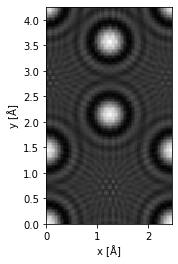

In [5]:
exit_wave.show()

<AxesSubplot:xlabel='alpha [mrad]', ylabel='Envelope'>

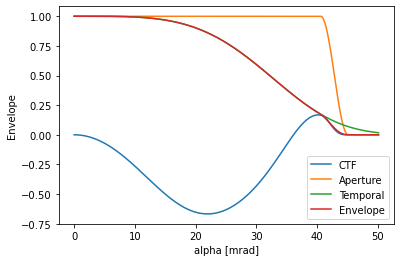

In [6]:
# See https://abtem.readthedocs.io/en/latest/walkthrough/05_contrast_transfer_function.html for parameter names

ctf = CTF(
    energy = wave.energy,
    semiangle_cutoff = 45, # mrad
    focal_spread = 25, # Å
    defocus = -45.46, # Å
    Cs = -7e-6 * 1e10, # Å
)

ctf.show(50)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x7efc6cca5f70>)

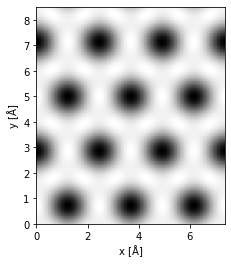

In [7]:
image_wave = exit_wave.apply_ctf(ctf)

image_wave.intensity().tile((3,2)).show()

In [9]:
# get image intensity as array

image_wave.intensity().array

array([[[1.0292144, 1.0292286, 1.0292751, ..., 1.0292166, 1.0292261,
         1.0292189],
        [1.0292244, 1.0292306, 1.029269 , ..., 1.0292479, 1.0292504,
         1.0292363],
        [1.0292528, 1.0292356, 1.0292492, ..., 1.0293396, 1.0293224,
         1.029287 ],
        ...,
        [1.0292956, 1.0292393, 1.0292118, ..., 1.0294874, 1.0294374,
         1.0293669],
        [1.0292525, 1.0292351, 1.0292488, ..., 1.0293393, 1.0293221,
         1.029287 ],
        [1.0292242, 1.0292304, 1.029269 , ..., 1.0292476, 1.0292501,
         1.0292361]]], dtype=float32)